# 随机梯度下降法实战

## 1.构建数据集
$ y = 2 * x$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
X =  np.arange(0,50)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [26]:
# [-5,5)
np.random.seed(1)
RandomArray = (np.random.random(50)*2 -1 ) * 5
RandomArray

array([-0.82977995,  2.20324493, -4.99885625, -1.97667427, -3.53244109,
       -4.07661405, -3.13739789, -1.54439273, -1.03232526,  0.38816734,
       -0.80805486,  1.852195  , -2.9554775 ,  3.78117436, -4.72612407,
        1.7046751 , -0.82695198,  0.58689828, -3.59613061, -3.01898511,
        3.00744569,  4.68261576, -1.86575822,  1.92322616,  3.76389152,
        3.94606664, -4.14955789, -4.60945217, -3.3016958 ,  3.78142503,
       -4.01653166, -0.78892375,  4.5788953 ,  0.33165285,  1.91877114,
       -1.84484369,  1.86500928,  3.34625672, -4.81711723,  2.50144315,
        4.88861089,  2.48165654, -2.19556008,  2.89279328, -3.96773993,
       -0.52106474,  4.08595503, -2.06385852, -2.12224661, -3.69971428])

In [27]:
y = 2 * X + RandomArray
y

array([-0.82977995,  4.20324493, -0.99885625,  4.02332573,  4.46755891,
        5.92338595,  8.86260211, 12.45560727, 14.96767474, 18.38816734,
       19.19194514, 23.852195  , 21.0445225 , 29.78117436, 23.27387593,
       31.7046751 , 31.17304802, 34.58689828, 32.40386939, 34.98101489,
       43.00744569, 46.68261576, 42.13424178, 47.92322616, 51.76389152,
       53.94606664, 47.85044211, 49.39054783, 52.6983042 , 61.78142503,
       55.98346834, 61.21107625, 68.5788953 , 66.33165285, 69.91877114,
       68.15515631, 73.86500928, 77.34625672, 71.18288277, 80.50144315,
       84.88861089, 84.48165654, 81.80443992, 88.89279328, 84.03226007,
       89.47893526, 96.08595503, 91.93614148, 93.87775339, 94.30028572])

In [28]:
import matplotlib.pyplot as plt #pip install matplotlib

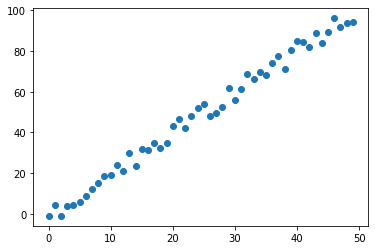

In [29]:
plt.scatter(X,y)

In [30]:
X.shape,y.shape

((50,), (50,))

In [31]:
X = X.reshape(50,1)
y = y.reshape(50,1)

In [32]:
All_data = np.concatenate((X,y),axis=1)
All_data

array([[ 0.        , -0.82977995],
       [ 1.        ,  4.20324493],
       [ 2.        , -0.99885625],
       [ 3.        ,  4.02332573],
       [ 4.        ,  4.46755891],
       [ 5.        ,  5.92338595],
       [ 6.        ,  8.86260211],
       [ 7.        , 12.45560727],
       [ 8.        , 14.96767474],
       [ 9.        , 18.38816734],
       [10.        , 19.19194514],
       [11.        , 23.852195  ],
       [12.        , 21.0445225 ],
       [13.        , 29.78117436],
       [14.        , 23.27387593],
       [15.        , 31.7046751 ],
       [16.        , 31.17304802],
       [17.        , 34.58689828],
       [18.        , 32.40386939],
       [19.        , 34.98101489],
       [20.        , 43.00744569],
       [21.        , 46.68261576],
       [22.        , 42.13424178],
       [23.        , 47.92322616],
       [24.        , 51.76389152],
       [25.        , 53.94606664],
       [26.        , 47.85044211],
       [27.        , 49.39054783],
       [28.        ,

## 划分样本为训练集D和测试集V
4:1

In [33]:
np.random.shuffle(All_data)
All_data

array([[ 5.        ,  5.92338595],
       [29.        , 61.78142503],
       [ 9.        , 18.38816734],
       [22.        , 42.13424178],
       [33.        , 66.33165285],
       [16.        , 31.17304802],
       [49.        , 94.30028572],
       [35.        , 68.15515631],
       [31.        , 61.21107625],
       [36.        , 73.86500928],
       [18.        , 32.40386939],
       [14.        , 23.27387593],
       [ 4.        ,  4.46755891],
       [41.        , 84.48165654],
       [27.        , 49.39054783],
       [48.        , 93.87775339],
       [46.        , 96.08595503],
       [26.        , 47.85044211],
       [47.        , 91.93614148],
       [11.        , 23.852195  ],
       [12.        , 21.0445225 ],
       [ 2.        , -0.99885625],
       [39.        , 80.50144315],
       [21.        , 46.68261576],
       [20.        , 43.00744569],
       [ 6.        ,  8.86260211],
       [30.        , 55.98346834],
       [44.        , 84.03226007],
       [ 0.        ,

In [34]:
train_data = All_data[:40]

In [35]:
test_data = All_data[40:]

In [36]:
train_data,test_data

(array([[ 5.        ,  5.92338595],
        [29.        , 61.78142503],
        [ 9.        , 18.38816734],
        [22.        , 42.13424178],
        [33.        , 66.33165285],
        [16.        , 31.17304802],
        [49.        , 94.30028572],
        [35.        , 68.15515631],
        [31.        , 61.21107625],
        [36.        , 73.86500928],
        [18.        , 32.40386939],
        [14.        , 23.27387593],
        [ 4.        ,  4.46755891],
        [41.        , 84.48165654],
        [27.        , 49.39054783],
        [48.        , 93.87775339],
        [46.        , 96.08595503],
        [26.        , 47.85044211],
        [47.        , 91.93614148],
        [11.        , 23.852195  ],
        [12.        , 21.0445225 ],
        [ 2.        , -0.99885625],
        [39.        , 80.50144315],
        [21.        , 46.68261576],
        [20.        , 43.00744569],
        [ 6.        ,  8.86260211],
        [30.        , 55.98346834],
        [44.        , 84.032

In [37]:
np.sum(All_data[:,0]*2 - All_data[:,1])

16.51220018240119

# SGD算法实现
![SGD](SGD.jpg)

In [38]:
# 超参
lr = 0.00001 #学习率
N = 100
epsilon = 200

In [39]:
# 参数
theta = np.random.rand()
theta

0.8833060912058098

In [40]:
randint = np.random.randint(0,20)
rand_x = train_data[randint][0]
rand_y = train_data[randint][1]
rand_x,rand_y

(26.0, 47.85044211369778)

In [41]:
Num = 1 
epsilon = 200
theta_list=[]
loss_list=[]
while True:
    # 重新排序D
    np.random.shuffle(train_data)
    for n in range(N):
        # 取随机样本
        randint = np.random.randint(0,20)
        rand_x = train_data[randint][0]
        rand_y = train_data[randint][1]
        # 计算梯度
        grad = rand_x * (rand_x * theta - rand_y)
        # 更新参数 theta
        theta = theta -lr * grad
    # 计算更新theta后的错误率
    X = train_data[:,0]
    y = train_data[:,1]  
    loss = np.sum(0.5*((theta*X - y)**2))
    print("Number: %d , theta: %f ，loss: %f"%(Num,theta,loss))
    Num = Num + 1
    theta_list.append(theta)
    loss_list.append(loss)
    if loss < epsilon :
        break

Number: 1 , theta: 1.622147 ，loss: 2474.857165
Number: 2 , theta: 1.804256 ，loss: 798.807102
Number: 3 , theta: 1.895873 ，loss: 361.733828
Number: 4 , theta: 1.964958 ，loss: 211.946974
Number: 5 , theta: 1.990060 ，loss: 195.810013
Number: 6 , theta: 1.987188 ，loss: 196.622221
Number: 7 , theta: 2.012946 ，loss: 198.883100
Number: 8 , theta: 1.988958 ，loss: 196.089932
Number: 9 , theta: 1.999530 ，loss: 195.024050
Number: 10 , theta: 2.000430 ，loss: 195.100527
Number: 11 , theta: 1.986212 ，loss: 196.959223
Number: 12 , theta: 1.975680 ，loss: 202.557496
Number: 13 , theta: 1.989077 ，loss: 196.057895
Number: 14 , theta: 1.994131 ，loss: 195.116157
Number: 15 , theta: 1.990975 ，loss: 195.607108
Number: 16 , theta: 2.000199 ，loss: 195.078358
Number: 17 , theta: 1.990859 ，loss: 195.631294
Number: 18 , theta: 2.014071 ，loss: 199.471857
Number: 19 , theta: 2.001688 ，loss: 195.251364
Number: 20 , theta: 2.013003 ，loss: 198.911903
Number: 21 , theta: 2.005685 ，loss: 196.070648
Number: 22 , theta: 2

KeyboardInterrupt: 

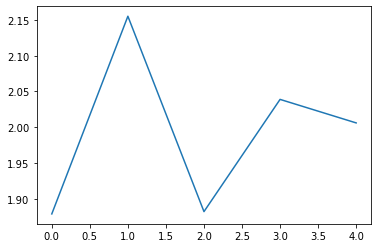

In [19]:
# 画图
plt.plot(range(len(theta_list)),theta_list)

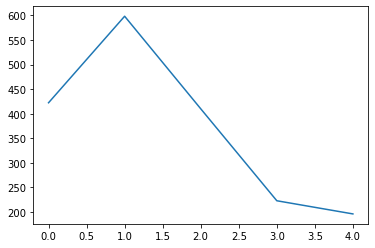

In [20]:
plt.plot(range(len(loss_list)),loss_list)